In [23]:
#Name : Nagaveti Bhavani Santhoshi Achyutha
#CWID : A20314248
#Course : CS5783 Machine Learning
#Assignment Name : Assignment 2 -- Neural Networks

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
X_test = np.loadtxt("X_test.csv")
X_train = np.loadtxt("X_train.csv")
y_train = np.loadtxt("Y_train.csv")
y_test = np.loadtxt("Y_test.csv")

In [3]:

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [4]:
y_train = y_train.reshape(100,1)
y_test = y_test.reshape(50,1)

In [5]:
# Initialize variables
learning_rate = 0.1
iterations = 15000
N = y_train.size

# number of input features
input_size = 2

# number of hidden layers neurons
hidden_size = 2

# number of neurons at the output layer
output_size = 1  

results = pd.DataFrame(columns=["mse", "accuracy"])

In [6]:
# Initialize weights
np.random.seed(10)

# initializing weight for the hidden layer
W1 = np.random.normal(scale=0.5, size=(input_size, hidden_size))   

# initializing weight for the output layer
W2 = np.random.normal(scale=0.5, size=(hidden_size , output_size)) 

In [7]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def mean_squared_error(y_pred, y_true):
    return ((y_pred - y_true)**2).sum() / (2*y_pred.size)
    
def accuracy(y_pred, y_true):
    acc = (abs(y_true - y_pred).sum()) / (y_pred.size)
    return acc/100

def relu(X):
   return np.maximum(0,X)

def tanh(x):
    t=(np.exp(x)-np.exp(-x))/(np.exp(x)+np.exp(-x))
    return t

In [8]:
for itr in range(iterations):    
    

    # on hidden layer
    Z1 = np.dot(X_train, W1)
    A1 = sigmoid(Z1)

    # on output layer
    Z2 = np.dot(A1, W2)
    A2 = relu(Z2)
    
    
    # Calculating error
    mse = mean_squared_error(A2, y_train)
    acc = accuracy(A2, y_train)
    results=results.append({"mse":mse, "accuracy":acc},ignore_index=True )
    
    # backpropagation
    E1 = A2 - y_train
    #E1 = 0.5 * ((y_train - A2)**2)
    dW1 = E1 * A2 * (1 - A2)

    E2 = np.dot(dW1, W2.T)
    dW2 = E2 * A1 * (1 - A1)

    
    # weight updates
    W2_update = np.dot(A1.T, dW1) / N
    W1_update = np.dot(X_train.T, dW2) / N

    W2 = W2 - learning_rate * W2_update
    W1 = W1 - learning_rate * W1_update

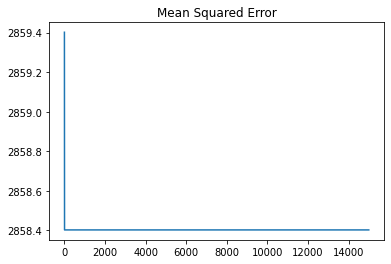

In [9]:
results.mse.plot(title="Mean Squared Error")

In [10]:
max(results['accuracy'])

0.6358015941888981

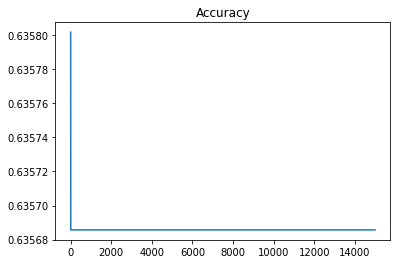

In [11]:
results.accuracy.plot(title="Accuracy")

In [12]:
Z1 = np.dot(X_test, W1)
A1 = sigmoid(Z1)

Z2 = np.dot(A1, W2)
A2 = relu(Z2)

acc = accuracy(A2, y_test)
print("Accuracy: {}".format(acc))

Accuracy: 0.6107508553595719


In [13]:
Z1 = np.dot(X_train, W1)
A1 = sigmoid(Z1)

# on output layer
Z2 = np.dot(A1, W2)
A2 = relu(Z2)

# Calculating error
mse = mean_squared_error(A2, y_train)
print("MSE: {}".format(mse))

MSE: 2858.4015537116506


# change in learning rate

In [14]:
def accuracy_lr(learning_rate,iterations,N,input_size,hidden_size,output_size):
 

  results = pd.DataFrame(columns=["mse", "accuracy"])
  np.random.seed(10)
  # initializing weight for the hidden layer
  W1 = np.random.normal(scale=0.5, size=(input_size, hidden_size))
  # initializing weight for the output layer
  W2 = np.random.normal(scale=0.5, size=(hidden_size , output_size)) 
  for itr in range(iterations):    
    
    # feedforward propagation
    # on hidden layer
    Z1 = np.dot(X_train, W1)
    A1 = sigmoid(Z1)

    # on output layer
    Z2 = np.dot(A1, W2)
    A2 = relu(Z2)
    
    
    # Calculating error
    mse = mean_squared_error(A2, y_train)
    acc = accuracy(A2, y_train)
    results=results.append({"mse":mse, "accuracy":acc},ignore_index=True )
    
    # backpropagation
    E1 = A2 - y_train
    dW1 = E1 * A2 * (1 - A2)

    E2 = np.dot(dW1, W2.T)
    dW2 = E2 * A1 * (1 - A1)

    
    # weight updates
    W2_update = np.dot(A1.T, dW1) / N
    W1_update = np.dot(X_train.T, dW2) / N

    W2 = W2 - learning_rate * W2_update
    W1 = W1 - learning_rate * W1_update
  # feedforward
  Z1 = np.dot(X_test, W1)
  A1 = sigmoid(Z1)

  Z2 = np.dot(A1, W2)
  A2 = relu(Z2)

  acc = accuracy(A2, y_test)
  return acc

In [15]:
lr = [0.009, 0.03,0.07,0.1,0.5,0.8,1]
lst = []
for i in lr:
  lst.append(accuracy_lr(i,5000,100,2,2,1))

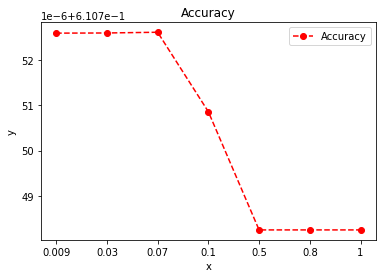

In [16]:
import matplotlib.pyplot as plt

# create an index for each tick position
xi = list(range(len(lr)))

# plot the index for the x-values
plt.plot(xi, lst, marker='o', linestyle='--', color='r', label='Accuracy') 
plt.xlabel('x')
plt.ylabel('y') 
plt.xticks(xi, lr)
plt.title('Accuracy')
plt.legend() 
plt.show()

# change neurons of hidden layer from 1 to 10 

In [19]:
hln = [3,5,8,9,10]
lst_n = []
for j in hln:
  lst_n.append(accuracy_lr(0.03,5000,100,2,j,1))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in square
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: RuntimeWarning: overflow encountered in multiply
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in multiply


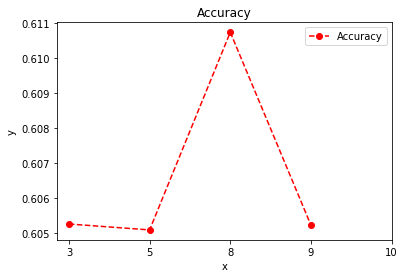

In [20]:
import matplotlib.pyplot as plt

# create an index for each tick position
xi = list(range(len(hln)))

# plot the index for the x-values
plt.plot(xi, lst_n, marker='o', linestyle='--', color='r', label='Accuracy') 
plt.xlabel('x')
plt.ylabel('y') 
plt.xticks(xi, hln)
plt.title('Accuracy')
plt.legend() 
plt.show()

# two different activation functions other than sigmoid 

In [21]:
def accuracy_act(learning_rate,iterations,N,input_size,hidden_size,output_size):
 

  results = pd.DataFrame(columns=["mse", "accuracy"])
  np.random.seed(10)
  # initializing weight for the hidden layer
  W1 = np.random.normal(scale=0.5, size=(input_size, hidden_size))
  # initializing weight for the output layer
  W2 = np.random.normal(scale=0.5, size=(hidden_size , output_size)) 
  for itr in range(iterations):    
    
    # feedforward propagation
    # on hidden layer
    Z1 = np.dot(X_train, W1)
    A1 = tanh(Z1)

    # on output layer
    Z2 = np.dot(A1, W2)
    A2 = relu(Z2)
    
    
    # Calculating error
    mse = mean_squared_error(A2, y_train)
    acc = accuracy(A2, y_train)
    results=results.append({"mse":mse, "accuracy":acc},ignore_index=True )
    
    # backpropagation
    E1 = A2 - y_train
    dW1 = E1 * A2 * (1 - A2)

    E2 = np.dot(dW1, W2.T)
    dW2 = E2 * A1 * (1 - A1)

    
    # weight updates
    W2_update = np.dot(A1.T, dW1) / N
    W1_update = np.dot(X_train.T, dW2) / N

    W2 = W2 - learning_rate * W2_update
    W1 = W1 - learning_rate * W1_update
  # feedforward
  Z1 = np.dot(X_test, W1)
  A1 = tanh(Z1)

  Z2 = np.dot(A1, W2)
  A2 = relu(Z2)

  acc = accuracy(A2, y_test)
  return acc

In [22]:
accuracy_act(0.03,5000,100,2,2,1)

0.6054151883182828